In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# load dataset
df_original = pd.read_csv('Churn_Modelling.csv')
dataframe = df_original

In [51]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
# describe dataset
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
dataframe.shape

(10000, 14)

In [54]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
print("check for Duplicated Data",dataframe.duplicated().sum())

check for Duplicated Data 0


In [56]:
# dataframe.replace(['yes','no'],[1,0],inplace = True)
# dataframe.head()

In [57]:
# check for col
print("\n Column name",dataframe.columns)


 Column name Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [58]:
# check for datatype
print("\n",dataframe.dtypes)


 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [59]:
# drop unwanted col
dataframe= dataframe.drop(['Surname','RowNumber'], axis=1)
dataframe.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [60]:
dataframe = pd.get_dummies(dataframe)
dataframe.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [61]:
dataframe.shape

(10000, 15)

In [62]:
# check for min values
dataframe.min()

CustomerId           15565701.00
CreditScore               350.00
Age                        18.00
Tenure                      0.00
Balance                     0.00
NumOfProducts               1.00
HasCrCard                   0.00
IsActiveMember              0.00
EstimatedSalary            11.58
Exited                      0.00
Geography_France            0.00
Geography_Germany           0.00
Geography_Spain             0.00
Gender_Female               0.00
Gender_Male                 0.00
dtype: float64

In [63]:
# replace min values with mean
dataframe.replace(0.0, dataframe.mean(),inplace= True)
dataframe.replace(np.NaN,dataframe.mean(),inplace= True)

dataframe.min()

CustomerId           1.556570e+07
CreditScore          3.500000e+02
Age                  1.800000e+01
Tenure               1.000000e+00
Balance              3.768690e+03
NumOfProducts        1.000000e+00
HasCrCard            7.055000e-01
IsActiveMember       5.151000e-01
EstimatedSalary      1.158000e+01
Exited               2.037000e-01
Geography_France     5.014000e-01
Geography_Germany    2.509000e-01
Geography_Spain      2.477000e-01
Gender_Female        4.543000e-01
Gender_Male          5.457000e-01
dtype: float64

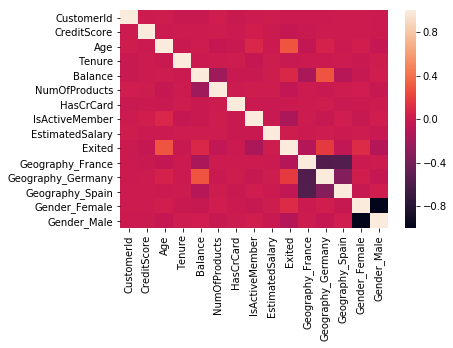

In [64]:
corr = dataframe.corr()
sns.heatmap(corr)

In [65]:
dataframe = ((dataframe - dataframe.min())
             /
             (dataframe.max()- dataframe.min()))
dataframe.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.275616,0.538,0.324324,0.111111,0.294247,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.326454,0.516,0.310811,0.000000,0.323876,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.214421,0.304,0.324324,0.777778,0.630812,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.542636,0.698,0.283784,0.000000,0.294247,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,0.688778,1.000,0.337838,0.111111,0.492625,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0


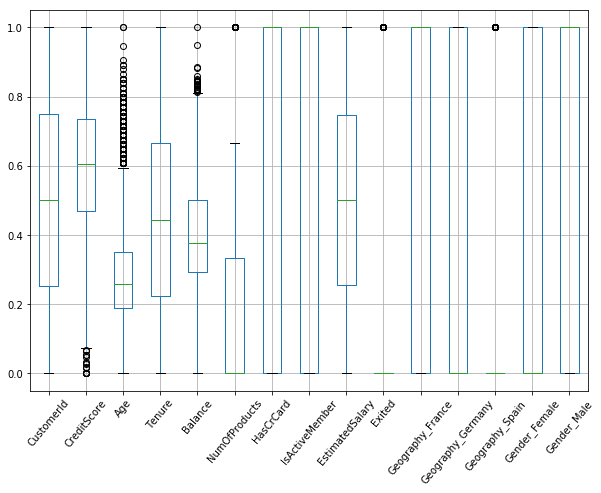

In [66]:
dataframe.boxplot(rot=50, figsize=(10,7))

In [67]:
def Split(data):
    train=int(0.70*len(data))
    test=int(0.30*len(data))
    return train,test

train , test = Split(dataframe)

print("Train data: ",train)
print("Test data: ",test)

Train data:  7000
Test data:  3000


In [68]:
train_data = dataframe.head(train)
test_data = dataframe.tail(test)

# print("Train_data:")
# train_data.head()

# print("test_data:")
# test_data.head()

In [69]:
def seperate(data):
    y = data.Exited
    data = data.drop('Exited',axis = 1)
    return data,y
x_train_data,y_train_data = seperate(train_data)
x_test_data, y_test_data = seperate(test_data)

x_train_data = np.array(x_train_data)   
y_train_data = np.array(y_train_data)
x_test_data  = np.array(x_test_data)
y_test_data  = np.array(y_test_data)

print("x_train_data ",x_train_data.shape)
print("y_train_data ",y_train_data.shape)
print("x_test_data ",x_test_data.shape)
print("y_test_data ",y_test_data.shape)

x_train_data  (7000, 14)
y_train_data  (7000,)
x_test_data  (3000, 14)
y_test_data  (3000,)


In [70]:
class Single_Layer_NN:
    
    def __init__(self):
        self.learning_rate = 0.0008
        self.epoch = 1000
        
    def gradient_descent(self,x_train_data,y_train_data):
        
        size = len(x_train_data)
#         print(size) (3164,)
        dw = 0.01
        dz = 0.0
        db = 0.0
        nshape = x_train_data.shape[1]
#         print(nshape) (3164, 22)

        w = np.full((nshape),0.5)
#         print(w.shape)  (22, 1)
        b = np.ones((1,1) ,dtype='float')
#         print(b)  [[1.]]
        
        for i in range(self.epoch):
            
            z = np.dot(w.T,x_train_data.T) + b
    #         print(z.shape)  (1, 3164)

            a = 1/ 1 + np.exp(-z)
    #         print(a.shape)  (1, 3164)

            dz = a - y_train_data.T
    #       print(dz.shape)  (1, 3164)

            dw = np.dot(dz,x_train_data)/size
#             print(dw.shape)  (1, 22)

            db = 1/size*np.sum(dz, axis =0 ,keepdims=False)
#         print(db.shape)  (1, 1)

            w = w - np.dot(self.learning_rate , dw.T)
            #print(w.shape)
            
            b = b - np.dot(self.learning_rate , db)
#         print(b.shape)
        
        return w, b
    
    def prediction(self, w, b, x_test_data):
        
        y_prediction = np.zeros((x_test_data.shape[0], 1),dtype = 'float')
        
#         print(w.shape)  (22, 1)
#         print(x_test_data.shape)  (1356, 22)

        z = np.dot(w.T, x_test_data.T) + b
#         print(z.shape)  (1, 1356)
        
        a = 1/ (1 + np.exp(-z))
        a = pd.DataFrame(a)
#         print(a[:100])
#         print(a.shape)  (1, 1356)
        b = a.shape[1]
        
        for i in range(0,a.shape[1]):
            if round(a[i][0],2 )<= 0.5:
                y_prediction[i][0] = 1
            else:
                y_prediction[i][0] = 0
                
        y_prediction = np.reshape(y_prediction, (len(y_prediction), 1))
#         print(y_prediction[:300])    

        return y_prediction

        
def main(dataframe,x_train_data,y_train_data,x_test_data,y_test_data):
    
    obj = Single_Layer_NN()
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0],1)),x_train_data))
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0],1)),x_test_data))
#     print(x_test_data.shape)
#     print(x_train_data.shape)
    
    w, b = obj.gradient_descent(x_train_data,y_train_data)
#     print("weight: ",w)
#     print("bias: ",b)

    y_prediction = obj.prediction(w, b, x_test_data)
#     for i in range(0,300):
#         print(y_prediction[i], y_test_data[i])

    test_accuracy = (100 - np.mean(np.abs(y_prediction - y_test_data)) * 100)
    print("Accuracy : ",test_accuracy)
    
    
main(dataframe, x_train_data,y_train_data,x_test_data,y_test_data) 
        

Accuracy :  80.2
